### Laboratorio #8

- Cristian Aguirre
- Diego Cordova 
- Paola Contreras

In [14]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import LabelEncoder

In [15]:
# Lectura archivo
data = pd.read_csv('bank_transactions.csv')

In [16]:
# Mostrar tamaño del dataset
print(data.shape)

# Mostrar datos del dataset
data.head()

(1048567, 9)


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [17]:
# Describir cada uno de los datos
data.describe()


,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [18]:
# Eliminar datos nulos
data.dropna(inplace=True)

# Eliminar data duplicada
data.drop_duplicates()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [19]:
# Droppear columnas que no se usaran
data.drop(["TransactionID", "CustomerID", "CustomerDOB", "TransactionDate","CustLocation","CustGender","TransactionDate","TransactionTime"], axis=1, inplace= True)

In [20]:
print(data)

         CustAccountBalance  TransactionAmount (INR)
0                  17819.05                     25.0
1                   2270.69                  27999.0
2                  17874.44                    459.0
3                 866503.21                   2060.0
4                   6714.43                   1762.5
...                     ...                      ...
1048562             7635.19                    799.0
1048563            27311.42                    460.0
1048564           221757.06                    770.0
1048565            10117.87                   1000.0
1048566            75734.42                   1166.0

[1041614 rows x 2 columns]


In [21]:
Scale = StandardScaler()
Scale = Scale.fit_transform(data)
norm = normalize(Scale)

data = pd.DataFrame(norm, columns = data.columns)


In [10]:
data

,CustAccountBalance,TransactionAmount (INR)
0,-0.439026,-0.898474
1,-0.033029,0.999454
2,-0.562198,-0.827003
3,0.996423,0.084511
4,-0.973682,0.227910
...,...,...
1041609,-0.735180,-0.677872
1041610,-0.523429,-0.852069
1041611,0.720549,-0.693404
1041612,-0.820558,-0.571563


In [18]:
from mixtureModel import GMM

In [19]:
model = GMM(n_components=7)

In [26]:
data = data.head(100)

In [27]:
data

,CustAccountBalance,TransactionAmount (INR)
0,-0.439026,-0.898474
1,-0.033029,0.999454
2,-0.562198,-0.827003
3,0.996423,0.084511
4,-0.973682,0.227910
...,...,...
95,-0.540243,-0.841509
96,-0.725303,-0.688430
97,-0.218014,0.975946
98,-0.687632,-0.726059


In [28]:
X = data.to_numpy()

In [29]:
X

array([[-0.43902649, -0.89847412],
       [-0.03302855,  0.99945441],
       [-0.56219761, -0.82700293],
       [ 0.99642253,  0.08451123],
       [-0.97368231,  0.22790953],
       [-0.47134586, -0.88194845],
       [-0.66209825, -0.74941705],
       [-0.1082261 , -0.99412631],
       [-0.72673947, -0.6869132 ],
       [-0.55767982, -0.83005615],
       [-0.36709162, -0.93018479],
       [-0.49536622, -0.86868424],
       [-0.05961284,  0.99822157],
       [-0.27084008, -0.96262436],
       [-0.55192898, -0.83389112],
       [-0.55634802, -0.83094939],
       [-0.89727304, -0.44147604],
       [-0.50052698, -0.86572094],
       [-0.45362742, -0.89119143],
       [-0.79306573, -0.60913606],
       [-0.49358085, -0.86969992],
       [-0.48625903, -0.87381471],
       [-0.52152141, -0.85323819],
       [-0.5273424 , -0.84965286],
       [-0.93621847,  0.35141852],
       [-0.54716235, -0.8370265 ],
       [-0.22040178,  0.97540917],
       [-0.73658862,  0.67634105],
       [ 0.97434976,

In [30]:
model.fit(X)

In [31]:
y_pred = model.predict(X)

In [32]:
y_pred

['comp1',
 'comp4',
 'comp5',
 'comp1',
 'comp6',
 'comp2',
 'comp0',
 'comp1',
 'comp0',
 'comp5',
 'comp1',
 'comp3',
 'comp4',
 'comp1',
 'comp5',
 'comp5',
 'comp6',
 'comp1',
 'comp1',
 'comp6',
 'comp3',
 'comp1',
 'comp1',
 'comp1',
 'comp6',
 'comp5',
 'comp4',
 'comp6',
 'comp1',
 'comp1',
 'comp1',
 'comp1',
 'comp4',
 'comp1',
 'comp6',
 'comp6',
 'comp6',
 'comp1',
 'comp0',
 'comp1',
 'comp1',
 'comp3',
 'comp1',
 'comp1',
 'comp1',
 'comp4',
 'comp1',
 'comp1',
 'comp4',
 'comp1',
 'comp3',
 'comp1',
 'comp1',
 'comp1',
 'comp2',
 'comp6',
 'comp1',
 'comp0',
 'comp4',
 'comp6',
 'comp5',
 'comp1',
 'comp1',
 'comp1',
 'comp1',
 'comp1',
 'comp2',
 'comp4',
 'comp1',
 'comp4',
 'comp2',
 'comp0',
 'comp6',
 'comp1',
 'comp6',
 'comp1',
 'comp2',
 'comp1',
 'comp1',
 'comp6',
 'comp1',
 'comp6',
 'comp6',
 'comp5',
 'comp1',
 'comp3',
 'comp6',
 'comp6',
 'comp1',
 'comp3',
 'comp4',
 'comp0',
 'comp6',
 'comp1',
 'comp1',
 'comp1',
 'comp0',
 'comp4',
 'comp0',
 'comp6']

Librerias 

In [22]:
import numpy as np
from sklearn.mixture import GaussianMixture

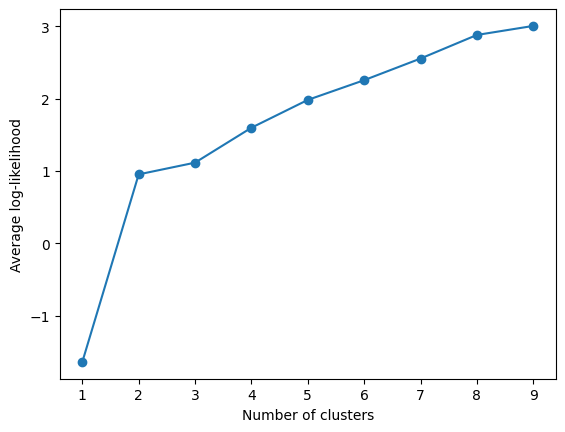

In [29]:
# extract the two columns as a numpy array
X = data[['CustAccountBalance','TransactionAmount (INR)']].values

n_clusters = range(1, 10)
log_likelihoods = []
for n in n_clusters:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(X)
    log_likelihoods.append(gmm.score(X))

# plot the elbow curve
plt.plot(n_clusters, log_likelihoods, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Average log-likelihood')
plt.show()